In [1]:
import random

import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

import tengp
from gpbenchmarks import get_data


def pdivide(x, y):
    return np.divide(x, y, out=np.copy(x), where=x!=0)

def plog(x, y):
    return np.log(x, out=np.copy(x), where=x>0)

def psin(x, y):
    return np.sin(x)

def pcos(x, y):
    return np.cos(x)

def pow2(x, y):
    return x**2

def pow3(x, y):
    return x**3

def ptan(x, y):
    return np.tan(x)

def ptanh(x, y):
    return np.tanh(x)

def psqrt(x, y):
    return  np.sqrt(x)

def pexp(x, y):
    return np.exp(x)


funset = tengp.FunctionSet()
funset.add(np.add, 2)
funset.add(np.subtract, 2)
funset.add(np.multiply, 2)
funset.add(pdivide, 2)
funset.add(plog, 2)
funset.add(psin, 2)
funset.add(pcos, 2)

#     function set: +, -, *, /, sin, cos, tan, tanh, sqrt, exp, log, **2, **3
ext_funset = tengp.FunctionSet()
ext_funset.add(np.add, 2)
ext_funset.add(np.subtract, 2)
ext_funset.add(np.multiply, 2)
ext_funset.add(pdivide, 2)
ext_funset.add(psin, 2)
ext_funset.add(pcos, 2)
ext_funset.add(ptan, 2)
ext_funset.add(ptanh, 2)
ext_funset.add(psqrt, 2)
ext_funset.add(pexp, 2)
ext_funset.add(plog, 2)
ext_funset.add(pow2, 2)
ext_funset.add(pow3, 2)

params1d = tengp.Parameters(2, 1, 1, 50, funset, real_valued=True)
params2d = tengp.Parameters(3, 1, 1, 50, funset, real_valued=True)
params5d = tengp.Parameters(6, 1, 1, 50, ext_funset, real_valued=True)

functions = [('nguyenf4', params1d, [20, -1, 1]), ('nguyenf7', params1d, [20, 0, 2]), ('nguyenf10', params2d, [100, -1, 1]), ('korns12', params5d, [10000, -50, 50])]

In [2]:
import pygmo as pg

vectors = []
n_actives = []

class cost_function:
    def __init__(self, X, Y, params, bounds):
        self.params = params
        self.bounds = bounds
        self.X = X
        self.Y = Y
    
    def fitness(self, x):
        #vectors.append(x)
        #x[-1] = round(x[-1])
        
        individual = tengp.individual.NPIndividual(list(x), self.bounds, self.params)
        pred = individual.transform(self.X)
        
        #n_actives.append(len(individual.active_nodes))
        
        try:
            return [mean_squared_error(pred, self.Y)]
        except ValueError:
            return [10000000000]
        
    def get_bounds(self):
        max_back = 10
        lower = [0]*len(self.bounds)
        for i in range(len(lower)):
            if i % 3 == 0:
                #print(lower[i],'\t', self.bounds[i])
                continue
            
            lower[i] = self.bounds[i] - max_back
            
            if lower[i] < 0:
                lower[i] = 0
            #print(lower[i], '\t', self.bounds[i])
            
                
        lower[-1] = self.bounds[-1] - max_back
        #print(lower[-1],'\t', self.bounds[-1])
        
        
        return (lower, [b for b in self.bounds])

In [9]:
%%time
results = []
champions = []

for f in functions:
    print(f[0])
    x, y = get_data(f[0], *f[2])
    x = np.c_[np.ones(len(x)), x]
    bounds = tengp.individual.IndividualBuilder(f[1]).create().bounds[:]

    prob = pg.problem(cost_function(x, y, f[1], bounds))
    
    problem_results = []
    pg.set_global_rng_seed(42)
    for i in range(100):
        print(i, end=', ')
        algo = pg.algorithm(pg.pso(
            gen=200,
#             eta1=0.1,
#             eta2=4,
            omega=1,
            max_vel=1,
#             variant=1,
#             neighb_type=4
        ))
        algo.set_verbosity(1)
        pop = pg.population(prob, 50)
        pop = algo.evolve(pop)
        problem_results.append(pop.champion_f[0])
        champions.append(pop.champion_x)
    results.append(problem_results)
    

nguyenf4
0, 

/home/jarino/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/home/jarino/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in cos
/home/jarino/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in greater
  app.launch_new_instance()
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:99: RuntimeWarning: invalid value encountered in multiply
  L = (1-b)*x_l1 + b*x_u1
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:100: RuntimeWarning: invalid value encountered in multiply
  U = (1-c)*x_l2 + c*x_u2
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:103: RuntimeWarning: invalid value encountered in add
  return l + u
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:102: RuntimeWarning: invalid value encountered in multiply
  u = a*f_u(L, U)
/home/jarino/anacond

1, 2, 

/home/jarino/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


3, 4, 

/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:101: RuntimeWarning: invalid value encountered in subtract
  l = (1-a)*f_l(L, U)


5, 6, 

/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:102: RuntimeWarning: invalid value encountered in subtract
  u = a*f_u(L, U)
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:101: RuntimeWarning: invalid value encountered in multiply
  l = (1-a)*f_l(L, U)


7, 8, 9, 

/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:100: RuntimeWarning: invalid value encountered in add
  U = (1-c)*x_l2 + c*x_u2


10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 

/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:99: RuntimeWarning: invalid value encountered in add
  L = (1-b)*x_l1 + b*x_u1


30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 

/home/jarino/anaconda3/lib/python3.6/site-packages/sklearn/metrics/regression.py:239: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,


57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, nguyenf7
0, 

/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:101: RuntimeWarning: invalid value encountered in add
  l = (1-a)*f_l(L, U)
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:102: RuntimeWarning: invalid value encountered in add
  u = a*f_u(L, U)


1, 2, 3, 4, 5, 

/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:125: RuntimeWarning: invalid value encountered in add
  value = (1-coeff)*self.nodes[lower].value + coeff*self.nodes[upper].value


6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, nguyenf10
0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, korns12
0, 

/home/jarino/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in sqrt
/home/jarino/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning: overflow encountered in exp
/home/jarino/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in square
/home/jarino/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in power
/home/jarino/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in tan
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:101: RuntimeWarning: overflow encountered in multiply
  l = (1-a)*f_l(L, U)
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:102: RuntimeWarning: overflow encountered in multiply
  u = a*f_u(L, U)
/home/jarino/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:70: RuntimeWarning: overflow encountered in

1, 2, 3, 

/home/jarino/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in true_divide
  del sys.path[0]


4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 

/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:102: RuntimeWarning: overflow encountered in subtract
  u = a*f_u(L, U)


25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, CPU times: user 5h 18min 18s, sys: 45.2 s, total: 5h 19min 3s
Wall time: 5h 24min 11s


In [10]:
def plot_results(outs):
    costs = np.array(outs)
    print('min:', np.min(costs))
    print('mean:', np.mean(costs))
    print('median:', np.median(costs))
    print('variance:',np.var(costs))
    sns.distplot(costs, kde=False);

Nguyen4
min: 0.10843032371948655
mean: 0.4671116124758092
median: 0.4373328342208157
variance: 0.06059686505616483


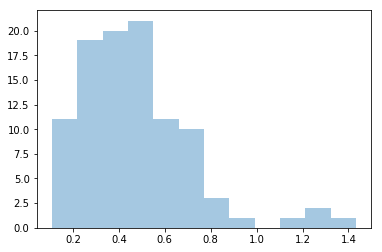

In [11]:
print('Nguyen4')
plot_results(results[0])

Nguyen7
min: 0.0006953988482836116
mean: 0.027386810064154478
median: 0.023412615262481454
variance: 0.00039817247629246626


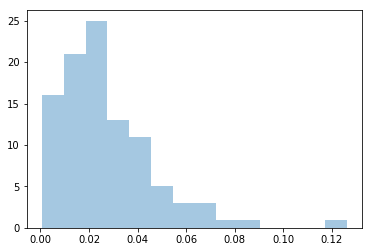

In [12]:
print('Nguyen7')
plot_results(results[1])

Nguyen10
min: 0.011682309114556451
mean: 0.02260654469032889
median: 0.020674463958679293
variance: 7.223556396076112e-05


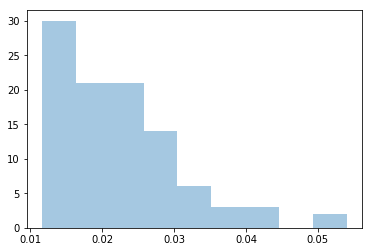

In [13]:
print('Nguyen10')
plot_results(results[2])

Korns12
min: 0.765976352858549
mean: 1.2729809201518527
median: 1.313316955366826
variance: 0.021261624288990505


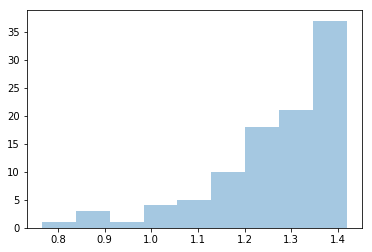

In [14]:
print('Korns12')
plot_results(results[3])